# Projet de machine learning en utilsant le processus CRISP-DM
Ajouter les sources :
- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
- Smartphone and Smartwatch-Based Biometrics Using Activities of Daily Living. IEEE Access, 7:133190-133202, Sept. 2019.

## Compréhension des affaires
*Il s'agira d'expliquer les objectifs du projet et de détailler le plan du projet*

## Compréhension des données
### Mise en place

In [4]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Récupération des données

In [7]:
import zipfile
import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00507/"
WISDM_PATH = os.path.join("datasets", "wisdm")
WISDM_URL = DOWNLOAD_ROOT + "wisdm-dataset.zip"

def fetch_wisdm_data(wisdm_url=WISDM_URL, wisdm_path=WISDM_PATH):
    if not os.path.isdir(wisdm_path):
        os.makedirs(wisdm_path)
    zip_path = os.path.join(wisdm_path, "wisdm-dataset.zip")
    if not os.path.isfile(zip_path):
        urllib.request.urlretrieve(wisdm_url, zip_path)
    uncompressed_path = os.path.join(wisdm_path, "wisdm-dataset")
    if not os.path.isdir(uncompressed_path):
        with zipfile.ZipFile(zip_path,"r") as zip_ref:
            zip_ref.extractall(wisdm_path)

In [8]:
fetch_wisdm_data()

### Description des données

Les données sont décrites dans le fichier WISDM-dataset-description.pdf du jeu de données précédemment téléchargé.
Ce jeu de données est composé de données provenant de 51 personnes à qui on a demandé de réaliser 18 tâches de 3 minutes. Chacun des sujets à une smartwatch attaché au poignet de leurs mains dominantes et un smartphone dans leurs poches. Les données collectés proviennent des girocscopes et des accéléromètres de la montre et du téléphone.

Un praitraitement des données à déja était fait dans le jeu de données. Il en résulte un jeu de données etiquetées sur les exemples au lieu de données étiquetées sur une série temporelle. Le traitement pour faire cela consiste à utiliser une fonction porte de 10s sur chaques séries temporelles de données.

In [19]:
# library for reading arff file
# You can install it via 'pip install liac-arff'
# https://pypi.org/project/liac-arff/ for more informations
import arff

def load_wisdm_data(wisdm_path=WISDM_PATH):
    arffPathExample = os.path.join(WISDM_PATH,'wisdm-dataset','arff_files','phone','accel','data_1600_accel_phone.arff')
    data = arff.load(open(arffPathExample, 'r'))
    return data

In [29]:
wisdmExample = load_wisdm_data()
import pandas as pd
attributesName = [wisdmExample['attributes'][i][0] for i in range (len(wisdmExample['attributes']))]
dataFrame = pd.DataFrame(data = wisdmExample['data'], columns=attributesName)
dataFrame.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.235,0.470,0.275,0.020,0.000,0.0,0.0,0.0,0.0,...,0.486106,0.479859,-0.550668,0.049864,0.121354,-0.251024,0.164468,-0.110722,10.05180,1600
1,A,0.275,0.440,0.270,0.015,0.000,0.0,0.0,0.0,0.0,...,0.479571,0.473409,-0.633171,0.072129,0.161492,-0.386416,0.215680,-0.034375,10.11710,1600
2,A,0.320,0.430,0.245,0.000,0.005,0.0,0.0,0.0,0.0,...,0.483005,0.476798,-0.659493,0.087043,0.162157,-0.325151,0.272380,-0.077274,9.98384,1600
3,A,0.315,0.495,0.185,0.005,0.000,0.0,0.0,0.0,0.0,...,0.480711,0.474534,-0.712081,0.003810,0.210015,-0.364285,0.203131,0.015328,10.10600,1600
4,A,0.215,0.455,0.325,0.005,0.000,0.0,0.0,0.0,0.0,...,0.468836,0.462811,-0.534933,0.047553,0.275833,-0.216423,0.238500,-0.009870,10.05210,1600


In [30]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 93 columns):
ACTIVITY     321 non-null object
X0           321 non-null float64
X1           321 non-null float64
X2           321 non-null float64
X3           321 non-null float64
X4           321 non-null float64
X5           321 non-null float64
X6           321 non-null float64
X7           321 non-null float64
X8           321 non-null float64
X9           321 non-null float64
Y0           321 non-null float64
Y1           321 non-null float64
Y2           321 non-null float64
Y3           321 non-null float64
Y4           321 non-null float64
Y5           321 non-null float64
Y6           321 non-null float64
Y7           321 non-null float64
Y8           321 non-null float64
Y9           321 non-null float64
Z0           321 non-null float64
Z1           321 non-null float64
Z2           321 non-null float64
Z3           321 non-null float64
Z4           321 non-null float64
Z5          

In [50]:
dataFrame.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.0,321.0,...,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,0.128816,0.264517,0.319969,0.235031,0.051277,0.000312,0.000047,0.000031,0.0,0.0,...,0.339085,0.335138,0.330831,0.221916,0.558735,0.595346,-0.100686,0.105777,-0.421535,9.697830
std,0.214657,0.335906,0.415449,0.402267,0.206116,0.001499,0.000482,0.000394,0.0,0.0,...,0.143267,0.141599,0.139780,0.862872,0.579945,0.550815,0.365069,0.421341,0.391955,0.460055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,-0.060974,-0.060264,-0.059490,-0.999917,-0.997769,-0.952187,-0.999753,-0.986312,-0.999803,9.171570
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.327565,0.323752,0.319591,-0.724125,0.098196,0.151871,-0.322235,-0.179483,-0.738426,9.327910
50%,0.000000,0.000000,0.120000,0.005000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.367562,0.363283,0.358614,0.986246,0.965633,0.994368,-0.076160,0.100942,-0.557509,9.637580
75%,0.240000,0.520000,0.905000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.409566,0.404798,0.399596,0.999207,0.999106,0.999577,0.127908,0.442266,-0.053193,9.985840
max,1.000000,1.000000,1.000000,1.000000,0.995000,0.010000,0.005000,0.005000,0.0,0.0,...,0.664408,0.656673,0.648235,0.999982,0.999951,0.999939,0.975860,0.999756,0.565919,11.428800


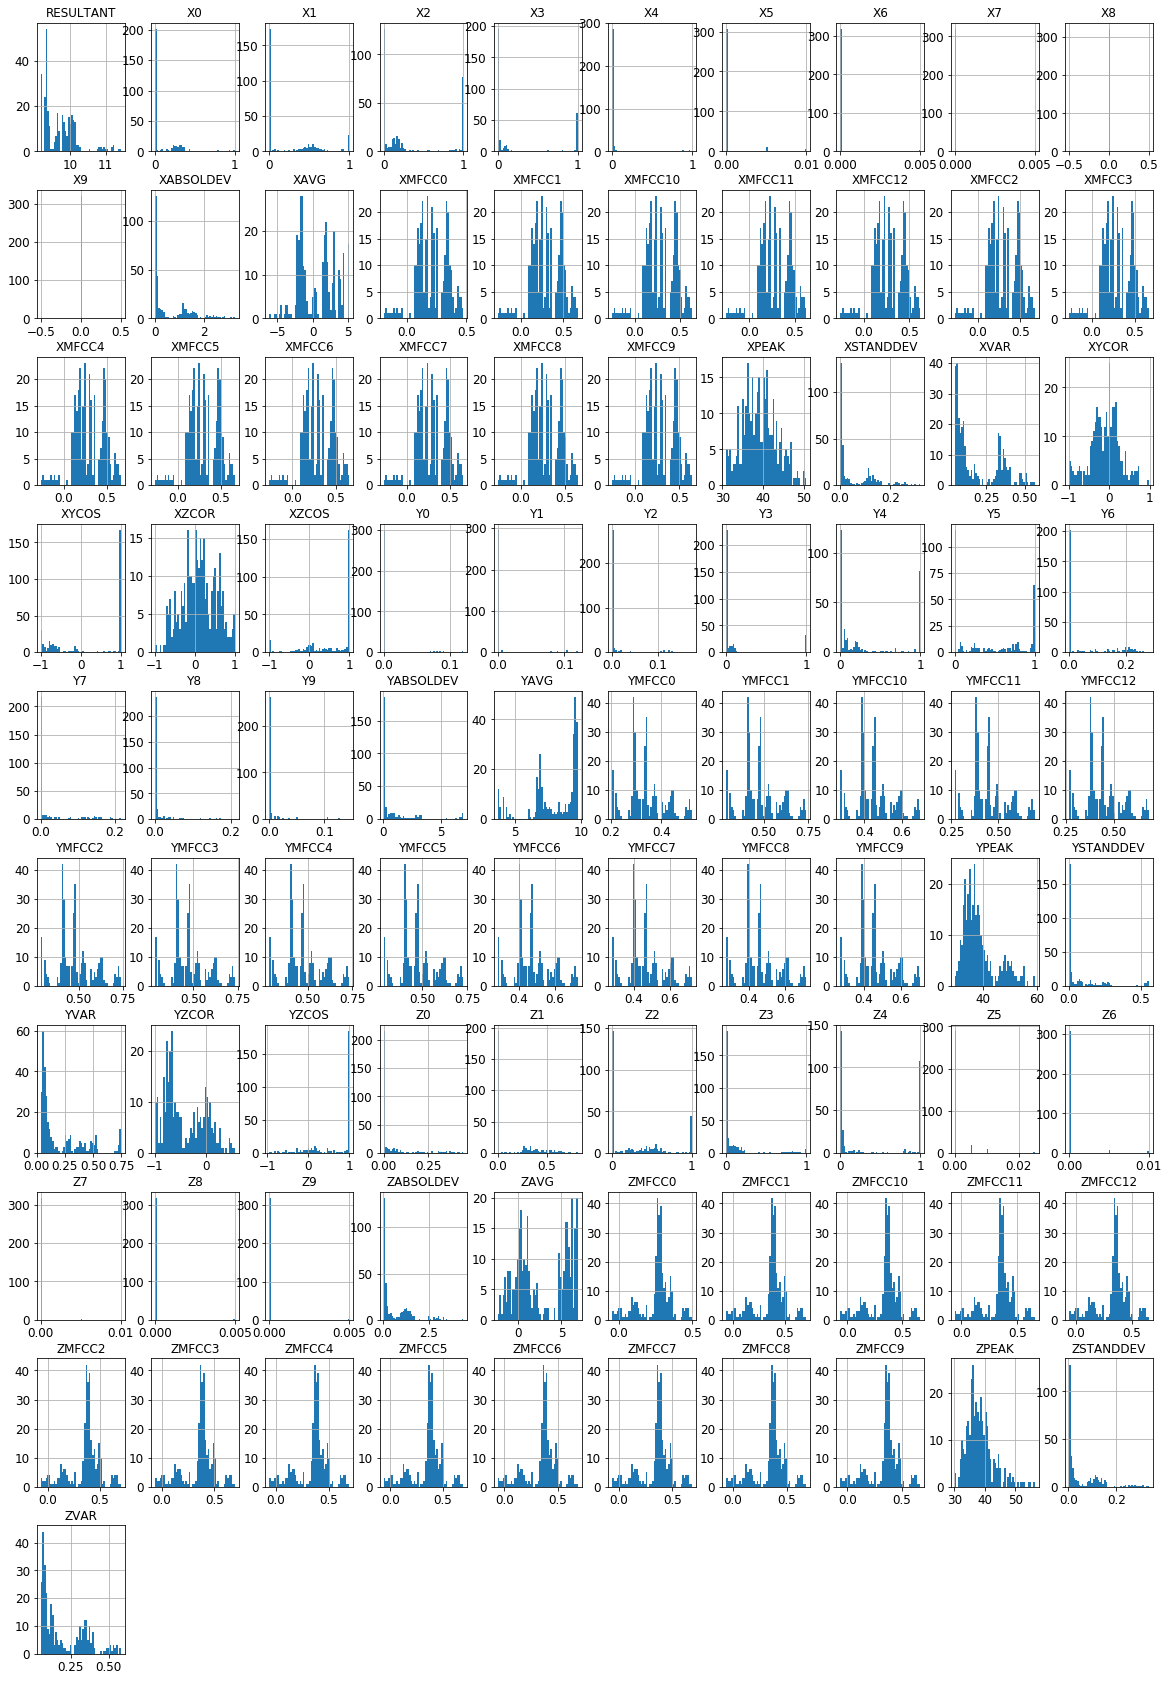

In [59]:
dataFrame.hist(bins = 50, figsize=(20,30))
#save_fig("attribute_histogram_plots")
plt.show()